In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../../')

In [3]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from config import STOCKTWITS_TICKER_LIST
from util.file_util import (
    StockTwitsFileReader, StockDataFileReader
)
from util.plot_util import plot_twit_series_for_ticker
from util.ts_util import resample_weekly

In [4]:
twit_file_reader = StockTwitsFileReader()

In [5]:
start_date = '2017-01-01'
end_date = '2019-08-10'

In [6]:
avg_twits = []

for t in STOCKTWITS_TICKER_LIST:
    twit_df = twit_file_reader.read_daily_sentiment_summary_prelim(t,
                                                                   start_date=start_date,
                                                                   end_date=end_date)
    
    avg_twits.append({
        'ticker': t,
        'avg_daily_twit': twit_df.sum(axis=1).mean(),
        'median_daily_twit': twit_df.sum(axis=1).median(),
    })
    
avg_twits = pd.DataFrame(avg_twits)

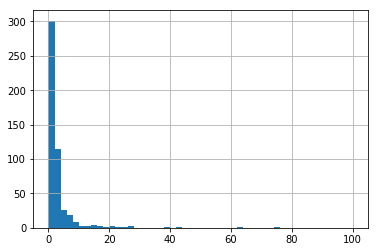

In [7]:
avg_twits['median_daily_twit'].hist(range=(0, 100), bins=50)

### Let's try looking at tickers that have daily median >= 2 Twits 

In [ ]:
filtered_twits = avg_twits[avg_twits['median_daily_twit'] >= 2]

In [ ]:
filtered_twits.shape

In [ ]:
filtered_tickers = filtered_twits['ticker'].tolist()

In [ ]:
with open('ticker_at_least_2_median.pkl', 'wb') as f:
    pickle.dump(filtered_tickers, f)

In [18]:
filtered_tickers_large = avg_twits.loc[avg_twits['median_daily_twit'] >= 10,
                                     'ticker'].tolist()

In [19]:
len(filtered_tickers_large)

32

In [20]:
with open('ticker_at_least_10_median.pkl', 'wb') as f:
    pickle.dump(filtered_tickers_large, f)

### Example of Weekly Twits and Stock Overlayed

In [ ]:
ticker = 'HBAN'

In [ ]:
plot_twit_series_for_ticker(ticker,
                            start_date,
                            end_date)